# Toy NN
### A minimal python NN library for multilayer neural nets.
There's a lot of these out there doing this with numpy in 11 lines of code or so; but I wanted this to be:
- easily extendable, so had to be at least a little object oriented
- multilayer; most of the minimal example have one or two hardcoded layers
- have customizable loss and activation functions. 

In the end this has 43 lines of codes, so I would argue it's still pretty minimal :)


## Usage
We're going to try to learn the classic `XOR` function using a couple of layers. Very similar to the scikit-learn example seen [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from toynn import NN, sigmoid, mse
%matplotlib inline

In [2]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))
X = np.random.randn(300,2)

We drew `X` at random, now we label the points according to the `XOR` rule:

In [3]:
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

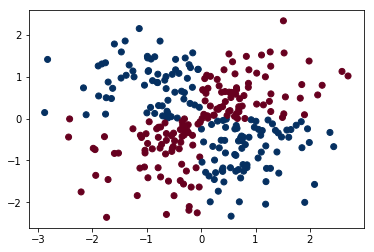

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdBu');

Now we create our model and fit to data; we will use a three layer network with 20 hidden neurons for each. Note that the input dimension is two (a point in 2D space) and that the output dimension is one (true or false).

In [5]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [6]:
model.train(X, Y, learning_rate = 1, n_train=30000)

loss: 0.25231
loss: 0.25099
loss: 0.25042
loss: 0.25018
loss: 0.25008
loss: 0.25004
loss: 0.25002
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 0.25001
loss: 

loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 0.25000
loss: 

loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 0.24999
loss: 

loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 0.24998
loss: 

loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 0.24997
loss: 

loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 0.24996
loss: 

loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 0.24995
loss: 

loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24994
loss: 0.24993
loss: 

loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 0.24992
loss: 

loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 0.24991
loss: 

loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 0.24989
loss: 

loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24987
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 0.24986
loss: 

loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24985
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 0.24984
loss: 

loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 0.24983
loss: 

loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 0.24981
loss: 

loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 0.24979
loss: 

loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 0.24977
loss: 

loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 0.24975
loss: 

loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 0.24972
loss: 

loss: 0.24968
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 0.24967
loss: 

loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24956
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 0.24955
loss: 

loss: 0.24923
loss: 0.24923
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24922
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24921
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24920
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24919
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24918
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 0.24917
loss: 

loss: 0.24733
loss: 0.24733
loss: 0.24732
loss: 0.24731
loss: 0.24731
loss: 0.24730
loss: 0.24730
loss: 0.24729
loss: 0.24729
loss: 0.24728
loss: 0.24728
loss: 0.24727
loss: 0.24726
loss: 0.24726
loss: 0.24725
loss: 0.24725
loss: 0.24724
loss: 0.24723
loss: 0.24723
loss: 0.24722
loss: 0.24722
loss: 0.24721
loss: 0.24721
loss: 0.24720
loss: 0.24719
loss: 0.24719
loss: 0.24718
loss: 0.24718
loss: 0.24717
loss: 0.24716
loss: 0.24716
loss: 0.24715
loss: 0.24715
loss: 0.24714
loss: 0.24713
loss: 0.24713
loss: 0.24712
loss: 0.24711
loss: 0.24711
loss: 0.24710
loss: 0.24710
loss: 0.24709
loss: 0.24708
loss: 0.24708
loss: 0.24707
loss: 0.24706
loss: 0.24706
loss: 0.24705
loss: 0.24705
loss: 0.24704
loss: 0.24703
loss: 0.24703
loss: 0.24702
loss: 0.24701
loss: 0.24701
loss: 0.24700
loss: 0.24699
loss: 0.24699
loss: 0.24698
loss: 0.24697
loss: 0.24697
loss: 0.24696
loss: 0.24696
loss: 0.24695
loss: 0.24694
loss: 0.24694
loss: 0.24693
loss: 0.24692
loss: 0.24692
loss: 0.24691
loss: 0.24690
loss: 

loss: 0.23262
loss: 0.23259
loss: 0.23256
loss: 0.23252
loss: 0.23249
loss: 0.23246
loss: 0.23243
loss: 0.23239
loss: 0.23236
loss: 0.23233
loss: 0.23229
loss: 0.23226
loss: 0.23223
loss: 0.23219
loss: 0.23216
loss: 0.23213
loss: 0.23209
loss: 0.23206
loss: 0.23203
loss: 0.23199
loss: 0.23196
loss: 0.23193
loss: 0.23189
loss: 0.23186
loss: 0.23182
loss: 0.23179
loss: 0.23176
loss: 0.23172
loss: 0.23169
loss: 0.23165
loss: 0.23162
loss: 0.23158
loss: 0.23155
loss: 0.23151
loss: 0.23148
loss: 0.23145
loss: 0.23141
loss: 0.23138
loss: 0.23134
loss: 0.23131
loss: 0.23127
loss: 0.23124
loss: 0.23120
loss: 0.23116
loss: 0.23113
loss: 0.23109
loss: 0.23106
loss: 0.23102
loss: 0.23099
loss: 0.23095
loss: 0.23091
loss: 0.23088
loss: 0.23084
loss: 0.23081
loss: 0.23077
loss: 0.23073
loss: 0.23070
loss: 0.23066
loss: 0.23062
loss: 0.23059
loss: 0.23055
loss: 0.23051
loss: 0.23048
loss: 0.23044
loss: 0.23040
loss: 0.23037
loss: 0.23033
loss: 0.23029
loss: 0.23025
loss: 0.23022
loss: 0.23018
loss: 

loss: 0.20269
loss: 0.20264
loss: 0.20259
loss: 0.20255
loss: 0.20250
loss: 0.20245
loss: 0.20240
loss: 0.20236
loss: 0.20231
loss: 0.20226
loss: 0.20222
loss: 0.20217
loss: 0.20212
loss: 0.20207
loss: 0.20203
loss: 0.20198
loss: 0.20193
loss: 0.20188
loss: 0.20184
loss: 0.20179
loss: 0.20174
loss: 0.20170
loss: 0.20165
loss: 0.20160
loss: 0.20155
loss: 0.20151
loss: 0.20146
loss: 0.20141
loss: 0.20137
loss: 0.20132
loss: 0.20127
loss: 0.20123
loss: 0.20118
loss: 0.20113
loss: 0.20108
loss: 0.20104
loss: 0.20099
loss: 0.20094
loss: 0.20090
loss: 0.20085
loss: 0.20080
loss: 0.20076
loss: 0.20071
loss: 0.20066
loss: 0.20062
loss: 0.20057
loss: 0.20052
loss: 0.20048
loss: 0.20043
loss: 0.20038
loss: 0.20033
loss: 0.20029
loss: 0.20024
loss: 0.20019
loss: 0.20015
loss: 0.20010
loss: 0.20005
loss: 0.20001
loss: 0.19996
loss: 0.19991
loss: 0.19987
loss: 0.19982
loss: 0.19977
loss: 0.19973
loss: 0.19968
loss: 0.19963
loss: 0.19959
loss: 0.19954
loss: 0.19949
loss: 0.19945
loss: 0.19940
loss: 

loss: 0.15746
loss: 0.15736
loss: 0.15726
loss: 0.15716
loss: 0.15706
loss: 0.15695
loss: 0.15685
loss: 0.15675
loss: 0.15665
loss: 0.15655
loss: 0.15644
loss: 0.15634
loss: 0.15624
loss: 0.15614
loss: 0.15604
loss: 0.15594
loss: 0.15583
loss: 0.15573
loss: 0.15563
loss: 0.15553
loss: 0.15543
loss: 0.15532
loss: 0.15522
loss: 0.15512
loss: 0.15502
loss: 0.15491
loss: 0.15481
loss: 0.15471
loss: 0.15461
loss: 0.15451
loss: 0.15440
loss: 0.15430
loss: 0.15420
loss: 0.15410
loss: 0.15399
loss: 0.15389
loss: 0.15379
loss: 0.15369
loss: 0.15358
loss: 0.15348
loss: 0.15338
loss: 0.15328
loss: 0.15317
loss: 0.15307
loss: 0.15297
loss: 0.15287
loss: 0.15276
loss: 0.15266
loss: 0.15256
loss: 0.15246
loss: 0.15235
loss: 0.15225
loss: 0.15215
loss: 0.15204
loss: 0.15194
loss: 0.15184
loss: 0.15174
loss: 0.15163
loss: 0.15153
loss: 0.15143
loss: 0.15132
loss: 0.15122
loss: 0.15112
loss: 0.15102
loss: 0.15091
loss: 0.15081
loss: 0.15071
loss: 0.15060
loss: 0.15050
loss: 0.15040
loss: 0.15029
loss: 

loss: 0.09146
loss: 0.09139
loss: 0.09132
loss: 0.09125
loss: 0.09117
loss: 0.09110
loss: 0.09103
loss: 0.09096
loss: 0.09089
loss: 0.09082
loss: 0.09075
loss: 0.09067
loss: 0.09060
loss: 0.09053
loss: 0.09046
loss: 0.09039
loss: 0.09032
loss: 0.09025
loss: 0.09018
loss: 0.09011
loss: 0.09004
loss: 0.08997
loss: 0.08990
loss: 0.08983
loss: 0.08976
loss: 0.08969
loss: 0.08962
loss: 0.08955
loss: 0.08948
loss: 0.08941
loss: 0.08934
loss: 0.08927
loss: 0.08920
loss: 0.08913
loss: 0.08906
loss: 0.08900
loss: 0.08893
loss: 0.08886
loss: 0.08879
loss: 0.08872
loss: 0.08865
loss: 0.08858
loss: 0.08852
loss: 0.08845
loss: 0.08838
loss: 0.08831
loss: 0.08824
loss: 0.08818
loss: 0.08811
loss: 0.08804
loss: 0.08797
loss: 0.08790
loss: 0.08784
loss: 0.08777
loss: 0.08770
loss: 0.08764
loss: 0.08757
loss: 0.08750
loss: 0.08744
loss: 0.08737
loss: 0.08730
loss: 0.08724
loss: 0.08717
loss: 0.08710
loss: 0.08704
loss: 0.08697
loss: 0.08690
loss: 0.08684
loss: 0.08677
loss: 0.08671
loss: 0.08664
loss: 

loss: 0.05957
loss: 0.05954
loss: 0.05952
loss: 0.05949
loss: 0.05946
loss: 0.05943
loss: 0.05941
loss: 0.05938
loss: 0.05935
loss: 0.05933
loss: 0.05930
loss: 0.05927
loss: 0.05925
loss: 0.05922
loss: 0.05919
loss: 0.05917
loss: 0.05914
loss: 0.05911
loss: 0.05909
loss: 0.05906
loss: 0.05903
loss: 0.05901
loss: 0.05898
loss: 0.05895
loss: 0.05893
loss: 0.05890
loss: 0.05887
loss: 0.05885
loss: 0.05882
loss: 0.05880
loss: 0.05877
loss: 0.05874
loss: 0.05872
loss: 0.05869
loss: 0.05867
loss: 0.05864
loss: 0.05861
loss: 0.05859
loss: 0.05856
loss: 0.05854
loss: 0.05851
loss: 0.05849
loss: 0.05846
loss: 0.05843
loss: 0.05841
loss: 0.05838
loss: 0.05836
loss: 0.05833
loss: 0.05831
loss: 0.05828
loss: 0.05826
loss: 0.05823
loss: 0.05821
loss: 0.05818
loss: 0.05815
loss: 0.05813
loss: 0.05810
loss: 0.05808
loss: 0.05805
loss: 0.05803
loss: 0.05800
loss: 0.05798
loss: 0.05795
loss: 0.05793
loss: 0.05790
loss: 0.05788
loss: 0.05785
loss: 0.05783
loss: 0.05780
loss: 0.05778
loss: 0.05776
loss: 

loss: 0.04769
loss: 0.04768
loss: 0.04766
loss: 0.04765
loss: 0.04764
loss: 0.04763
loss: 0.04762
loss: 0.04760
loss: 0.04759
loss: 0.04758
loss: 0.04757
loss: 0.04755
loss: 0.04754
loss: 0.04753
loss: 0.04752
loss: 0.04751
loss: 0.04749
loss: 0.04748
loss: 0.04747
loss: 0.04746
loss: 0.04744
loss: 0.04743
loss: 0.04742
loss: 0.04741
loss: 0.04740
loss: 0.04738
loss: 0.04737
loss: 0.04736
loss: 0.04735
loss: 0.04734
loss: 0.04732
loss: 0.04731
loss: 0.04730
loss: 0.04729
loss: 0.04728
loss: 0.04727
loss: 0.04725
loss: 0.04724
loss: 0.04723
loss: 0.04722
loss: 0.04721
loss: 0.04719
loss: 0.04718
loss: 0.04717
loss: 0.04716
loss: 0.04715
loss: 0.04713
loss: 0.04712
loss: 0.04711
loss: 0.04710
loss: 0.04709
loss: 0.04708
loss: 0.04706
loss: 0.04705
loss: 0.04704
loss: 0.04703
loss: 0.04702
loss: 0.04701
loss: 0.04699
loss: 0.04698
loss: 0.04697
loss: 0.04696
loss: 0.04695
loss: 0.04694
loss: 0.04693
loss: 0.04691
loss: 0.04690
loss: 0.04689
loss: 0.04688
loss: 0.04687
loss: 0.04686
loss: 

loss: 0.04214
loss: 0.04213
loss: 0.04212
loss: 0.04211
loss: 0.04211
loss: 0.04210
loss: 0.04209
loss: 0.04208
loss: 0.04208
loss: 0.04207
loss: 0.04206
loss: 0.04206
loss: 0.04205
loss: 0.04204
loss: 0.04203
loss: 0.04203
loss: 0.04202
loss: 0.04201
loss: 0.04201
loss: 0.04200
loss: 0.04199
loss: 0.04198
loss: 0.04198
loss: 0.04197
loss: 0.04196
loss: 0.04196
loss: 0.04195
loss: 0.04194
loss: 0.04193
loss: 0.04193
loss: 0.04192
loss: 0.04191
loss: 0.04191
loss: 0.04190
loss: 0.04189
loss: 0.04188
loss: 0.04188
loss: 0.04187
loss: 0.04186
loss: 0.04186
loss: 0.04185
loss: 0.04184
loss: 0.04184
loss: 0.04183
loss: 0.04182
loss: 0.04181
loss: 0.04181
loss: 0.04180
loss: 0.04179
loss: 0.04179
loss: 0.04178
loss: 0.04177
loss: 0.04177
loss: 0.04176
loss: 0.04175
loss: 0.04174
loss: 0.04174
loss: 0.04173
loss: 0.04172
loss: 0.04172
loss: 0.04171
loss: 0.04170
loss: 0.04170
loss: 0.04169
loss: 0.04168
loss: 0.04167
loss: 0.04167
loss: 0.04166
loss: 0.04165
loss: 0.04165
loss: 0.04164
loss: 

loss: 0.03849
loss: 0.03849
loss: 0.03848
loss: 0.03848
loss: 0.03847
loss: 0.03847
loss: 0.03846
loss: 0.03846
loss: 0.03845
loss: 0.03845
loss: 0.03844
loss: 0.03844
loss: 0.03844
loss: 0.03843
loss: 0.03843
loss: 0.03842
loss: 0.03842
loss: 0.03841
loss: 0.03841
loss: 0.03840
loss: 0.03840
loss: 0.03839
loss: 0.03839
loss: 0.03838
loss: 0.03838
loss: 0.03837
loss: 0.03837
loss: 0.03836
loss: 0.03836
loss: 0.03836
loss: 0.03835
loss: 0.03835
loss: 0.03834
loss: 0.03834
loss: 0.03833
loss: 0.03833
loss: 0.03832
loss: 0.03832
loss: 0.03831
loss: 0.03831
loss: 0.03830
loss: 0.03830
loss: 0.03830
loss: 0.03829
loss: 0.03829
loss: 0.03828
loss: 0.03828
loss: 0.03827
loss: 0.03827
loss: 0.03826
loss: 0.03826
loss: 0.03825
loss: 0.03825
loss: 0.03824
loss: 0.03824
loss: 0.03824
loss: 0.03823
loss: 0.03823
loss: 0.03822
loss: 0.03822
loss: 0.03821
loss: 0.03821
loss: 0.03820
loss: 0.03820
loss: 0.03819
loss: 0.03819
loss: 0.03818
loss: 0.03818
loss: 0.03818
loss: 0.03817
loss: 0.03817
loss: 

loss: 0.03577
loss: 0.03577
loss: 0.03576
loss: 0.03576
loss: 0.03576
loss: 0.03575
loss: 0.03575
loss: 0.03575
loss: 0.03574
loss: 0.03574
loss: 0.03574
loss: 0.03573
loss: 0.03573
loss: 0.03573
loss: 0.03572
loss: 0.03572
loss: 0.03572
loss: 0.03571
loss: 0.03571
loss: 0.03571
loss: 0.03570
loss: 0.03570
loss: 0.03570
loss: 0.03569
loss: 0.03569
loss: 0.03569
loss: 0.03568
loss: 0.03568
loss: 0.03568
loss: 0.03567
loss: 0.03567
loss: 0.03567
loss: 0.03567
loss: 0.03566
loss: 0.03566
loss: 0.03566
loss: 0.03565
loss: 0.03565
loss: 0.03565
loss: 0.03564
loss: 0.03564
loss: 0.03564
loss: 0.03563
loss: 0.03563
loss: 0.03563
loss: 0.03562
loss: 0.03562
loss: 0.03562
loss: 0.03561
loss: 0.03561
loss: 0.03561
loss: 0.03560
loss: 0.03560
loss: 0.03560
loss: 0.03559
loss: 0.03559
loss: 0.03559
loss: 0.03558
loss: 0.03558
loss: 0.03558
loss: 0.03558
loss: 0.03557
loss: 0.03557
loss: 0.03557
loss: 0.03556
loss: 0.03556
loss: 0.03556
loss: 0.03555
loss: 0.03555
loss: 0.03555
loss: 0.03554
loss: 

loss: 0.03407
loss: 0.03407
loss: 0.03407
loss: 0.03406
loss: 0.03406
loss: 0.03406
loss: 0.03406
loss: 0.03405
loss: 0.03405
loss: 0.03405
loss: 0.03405
loss: 0.03404
loss: 0.03404
loss: 0.03404
loss: 0.03404
loss: 0.03403
loss: 0.03403
loss: 0.03403
loss: 0.03403
loss: 0.03402
loss: 0.03402
loss: 0.03402
loss: 0.03402
loss: 0.03401
loss: 0.03401
loss: 0.03401
loss: 0.03401
loss: 0.03400
loss: 0.03400
loss: 0.03400
loss: 0.03400
loss: 0.03399
loss: 0.03399
loss: 0.03399
loss: 0.03399
loss: 0.03398
loss: 0.03398
loss: 0.03398
loss: 0.03398
loss: 0.03397
loss: 0.03397
loss: 0.03397
loss: 0.03397
loss: 0.03396
loss: 0.03396
loss: 0.03396
loss: 0.03396
loss: 0.03395
loss: 0.03395
loss: 0.03395
loss: 0.03395
loss: 0.03394
loss: 0.03394
loss: 0.03394
loss: 0.03394
loss: 0.03393
loss: 0.03393
loss: 0.03393
loss: 0.03393
loss: 0.03392
loss: 0.03392
loss: 0.03392
loss: 0.03392
loss: 0.03391
loss: 0.03391
loss: 0.03391
loss: 0.03391
loss: 0.03390
loss: 0.03390
loss: 0.03390
loss: 0.03390
loss: 

loss: 0.03214
loss: 0.03214
loss: 0.03214
loss: 0.03213
loss: 0.03213
loss: 0.03213
loss: 0.03213
loss: 0.03213
loss: 0.03213
loss: 0.03212
loss: 0.03212
loss: 0.03212
loss: 0.03212
loss: 0.03212
loss: 0.03211
loss: 0.03211
loss: 0.03211
loss: 0.03211
loss: 0.03211
loss: 0.03211
loss: 0.03210
loss: 0.03210
loss: 0.03210
loss: 0.03210
loss: 0.03210
loss: 0.03209
loss: 0.03209
loss: 0.03209
loss: 0.03209
loss: 0.03209
loss: 0.03209
loss: 0.03208
loss: 0.03208
loss: 0.03208
loss: 0.03208
loss: 0.03208
loss: 0.03208
loss: 0.03207
loss: 0.03207
loss: 0.03207
loss: 0.03207
loss: 0.03207
loss: 0.03206
loss: 0.03206
loss: 0.03206
loss: 0.03206
loss: 0.03206
loss: 0.03206
loss: 0.03205
loss: 0.03205
loss: 0.03205
loss: 0.03205
loss: 0.03205
loss: 0.03204
loss: 0.03204
loss: 0.03204
loss: 0.03204
loss: 0.03204
loss: 0.03204
loss: 0.03203
loss: 0.03203
loss: 0.03203
loss: 0.03203
loss: 0.03203
loss: 0.03202
loss: 0.03202
loss: 0.03202
loss: 0.03202
loss: 0.03202
loss: 0.03202
loss: 0.03201
loss: 

loss: 0.03115
loss: 0.03114
loss: 0.03114
loss: 0.03114
loss: 0.03114
loss: 0.03114
loss: 0.03114
loss: 0.03114
loss: 0.03113
loss: 0.03113
loss: 0.03113
loss: 0.03113
loss: 0.03113
loss: 0.03113
loss: 0.03112
loss: 0.03112
loss: 0.03112
loss: 0.03112
loss: 0.03112
loss: 0.03112
loss: 0.03112
loss: 0.03111
loss: 0.03111
loss: 0.03111
loss: 0.03111
loss: 0.03111
loss: 0.03111
loss: 0.03110
loss: 0.03110
loss: 0.03110
loss: 0.03110
loss: 0.03110
loss: 0.03110
loss: 0.03110
loss: 0.03109
loss: 0.03109
loss: 0.03109
loss: 0.03109
loss: 0.03109
loss: 0.03109
loss: 0.03109
loss: 0.03108
loss: 0.03108
loss: 0.03108
loss: 0.03108
loss: 0.03108
loss: 0.03108
loss: 0.03107
loss: 0.03107
loss: 0.03107
loss: 0.03107
loss: 0.03107
loss: 0.03107
loss: 0.03107
loss: 0.03106
loss: 0.03106
loss: 0.03106
loss: 0.03106
loss: 0.03106
loss: 0.03106
loss: 0.03105
loss: 0.03105
loss: 0.03105
loss: 0.03105
loss: 0.03105
loss: 0.03105
loss: 0.03105
loss: 0.03104
loss: 0.03104
loss: 0.03104
loss: 0.03104
loss: 

loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02994
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02993
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02992
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02991
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02990
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02989
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02988
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02987
loss: 0.02986
loss: 0.02986
loss: 0.02986
loss: 0.02986
loss: 0.02986
loss: 0.02986
loss: 

loss: 0.02909
loss: 0.02909
loss: 0.02909
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02908
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02907
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02906
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02905
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02904
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02903
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02902
loss: 0.02901
loss: 0.02901
loss: 0.02901
loss: 

loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02838
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02837
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02836
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02835
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02834
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02833
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02832
loss: 0.02831
loss: 

loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02775
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02774
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02773
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02772
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02771
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02770
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 0.02769
loss: 

loss: 0.02716
loss: 0.02716
loss: 0.02716
loss: 0.02716
loss: 0.02716
loss: 0.02716
loss: 0.02716
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02715
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02714
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02713
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02712
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02711
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 0.02710
loss: 

loss: 0.02652
loss: 0.02652
loss: 0.02652
loss: 0.02652
loss: 0.02652
loss: 0.02652
loss: 0.02652
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02651
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02650
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02649
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02648
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02647
loss: 0.02646
loss: 0.02646
loss: 0.02646
loss: 0.02646
loss: 0.02646
loss: 0.02646
loss: 0.02646
loss: 

loss: 0.02587
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02586
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02585
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02584
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02583
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02582
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02581
loss: 0.02580
loss: 0.02580
loss: 0.02580
loss: 

loss: 0.02521
loss: 0.02521
loss: 0.02521
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02520
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02519
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02518
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02517
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02516
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02515
loss: 0.02514
loss: 0.02514
loss: 0.02514
loss: 

loss: 0.02453
loss: 0.02453
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02452
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02451
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02450
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02449
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02448
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02447
loss: 0.02446
loss: 0.02446
loss: 0.02446
loss: 0.02446
loss: 0.02446
loss: 0.02446
loss: 

Allright, pretty good training loss, let's vizualize the results:

In [7]:
yhat = model.predict(np.c_[xx.ravel(), yy.ravel()])
yhat = yhat.reshape(xx.shape)

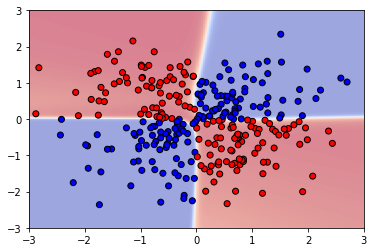

In [8]:
plt.imshow(yhat, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='coolwarm', alpha=0.5);

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap='bwr');
plt.axis([-3,3,-3,3]);

The data is in the scatter plot, and our predictions for all plots in the grid are the background colors: we managed to learn the XOR rule!